<h2><font color="#004D7F" size=6>Unsupervised learning (Enmanuel Martins A16430)</font></h2>


<br><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introdução](#section1)
    * [1.1. Library](#section11)
    * [1.2. Dataset](#section12)

* [2. Preprocessamento dos Dados](#section2)
    * [2.1. Clean Data](#section21)
        * [2.1.1. Remover Nulos](#section211)
        * [2.1.2. Converter Coluna Invoice para String](#section212)
        * [2.1.3. Converter Coluna InvoiceDate para DateTime](#section213)
        * [2.1.4. Remover Trails na Coluna Description](#section214)
        * [2.1.5. Remover Duplicados](#section215)
        * [2.1.6. Remover Cancelamentos ](#section216)
        * [2.1.7. Qt Maior que 0 e Price > 0](#section217)

* [3. Association Rules](#section3)
    * [3.1. Visualizacao do Paises em Mapa Geografico](#section31)
    * [3.2. Reduzir Número de Registros (Fazer para Portugal)](#section32)
    * [3.3. One Hot Encoding (True/False)](#section33)
    * [3.4. Remover Producto -> Postage ](#section34)
    * [3.5. Frequent itemsets (Apriori)](#section35)
    * [3.6. Learning Rules](#section36)

* [4. Filtragem das Regras](#section4)
    * [4.1. Adicionar Coluna com Número de Antecedentes](#section41)
    * [4.2. Exemplo para os Recomendados de Certo Produto](#section42)
    * [4.3. Extrair Apenas os Produtos Relacionados com o Produto em Análise](#section43)
    
* [5. Segmentação de Clientes (Kmeans)](#section5)
    * [5.1. RFM (Recency, Frequency, Monetary)](#section51)
    * [5.2. Remover Outliers (Manter Dados Entre o Percentil 5 e 95)](#section52)
    * [5.3. Standardizar Dados](#section53)
    * [5.4. Elbow Method](#section54)
    * [5.5. Silhouette Score](#section55)
    * [5.6. Clustering and Evaluating](#section56)
    * [5.7. 3D Scatter Plot](#section57)

* [6. Segmentacao de clientes (Kmeans) RFMT](#section6)
    * [6.1. Remover Outliers (manter dados entre o percentil 5 e 95) no RFMT)](#section61)
    * [6.2. Elbow Method (RFMT)](#section62)
    * [6.3. Silhouette Score (RFMT)](#section63)
    * [6.4. Clustering (RFMT)](#section64)
    * [6.5. Standardizar Dados](#section65)
    * [6.6. Evaluating (RFMT)](#section66)
    * [6.7. 3D Scatter Plot](#section67)


    


In [117]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\eel20\AppData\Local\Temp\ipykernel_30340\3261091095.py:1: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción </font>

- **Dataset para classificação automática:**

    Para esta parte do projeto utilizei o dataset Online Retails transaction data set of two years, que pode ser obtido no seguinte link do Kaggle:
    [Online Retail](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/data).

    O dataset está presente neste repositório no ficheiro denominado **online_retail_II.csv**.

    Este Dataset esta definido com 8 Columnas e 1067371 Linhas, estando definido e separado por os paises utilizados e productos.

    Atributos do dataset:
    - ID: identificador único de cada compra, não utilizado na análise.
    - Invoice: Número da fatura. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. "Int".
    - StockCode: Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto. "String".
	- Description: Nome do produto (item) que sao comprados. "String".
    - Quantity: As quantidades de cada produto (item) por transação. "Int".
    - InvoiceDate: Data e hora da fatura. O dia e a hora em que uma transação foi gerada. "Date".
    - Price: Preço unitário, Preço do produto por unidade em libras esterlinas. "Float".
    - Customer ID: Número do cliente, Um número integral de 5 dígitos atribuído exclusivamente a cada cliente. "Int"
    - Country: O nome do país onde o cliente reside. "String".



<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías </font>

### Read an clean data

In [118]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Dataset </font>

In [119]:
df = pd.read_csv('online_retail_II.csv', sep=",")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


<a id="section2"></a>
# <font color="#004D7F"> 2. Preprocessamento dos Dados </font>

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Clean Data </font>

### Clean data

In [120]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

<a id="section211"></a>
### <font color="#004D7F"> 2.1.1. Remover Nulos </font>

### Remover nulos

In [121]:
df.dropna(subset="Customer ID",axis=0,inplace=True)

In [122]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [124]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.0,12.414574,188.976099,-80995.0,2.00,5.00,12.00,80995.0
Price,824364.0,3.676800,70.241388,0.0,1.25,1.95,3.75,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.0,13975.00,15255.00,16797.00,18287.0


<a id="section212"></a>
### <font color="#004D7F"> 2.1.2. Converter Coluna Invoice para String </font>

In [126]:
df['Invoice'] = df['Invoice'].astype(str)

<a id="section212"></a>
### <font color="#004D7F"> 2.1.3. Converter coluna InvoiceDate para Datetime </font>

In [127]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<a id="section212"></a>
### <font color="#004D7F"> 2.1.4. Remover Trails na Coluna Description </font>


In [128]:
df['Description'] = df['Description'].str.strip()

<a id="section212"></a>
### <font color="#004D7F"> 2.1.5. Remover duplicados </font>


In [129]:
df = df.drop_duplicates(keep="first")

<a id="section212"></a>
### <font color="#004D7F"> 2.1.6. Remover cancelamentos (contem C no Invoice) </font>


In [130]:
df = df[~df['Invoice'].str.contains('C')]

<a id="section212"></a>
### <font color="#004D7F"> 2.1.7. Qt maior que 0 e Price > 0 </font>


In [131]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [132]:
df[['Quantity','Price', 'Customer ID']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,779425.0,13.489370,145.855814,1.000,2.00,6.00,12.00,80995.0
Price,779425.0,3.218488,29.676140,0.001,1.25,1.95,3.75,10953.5
Customer ID,779425.0,15320.360461,1695.692775,12346.000,13971.00,15247.00,16794.00,18287.0


<a id="section22"></a>
## <font color="#004D7F"> 3. Association Rules </font>



<a id="section221"></a>
### <font color="#004D7F"> 3.1.Visualizacao do Paises em Mapa Geografico </font>



Alguns países como EUA, EIRE, RSA, entre outros, não são reconhecidos pelo nome abreviado. Por isso, ao alterar seus valores, conseguimos representar em um mapa geográfico todos os países do CSV.

C:\Users\eel20\AppData\Local\Temp\ipykernel_30340\2673447869.py:49: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



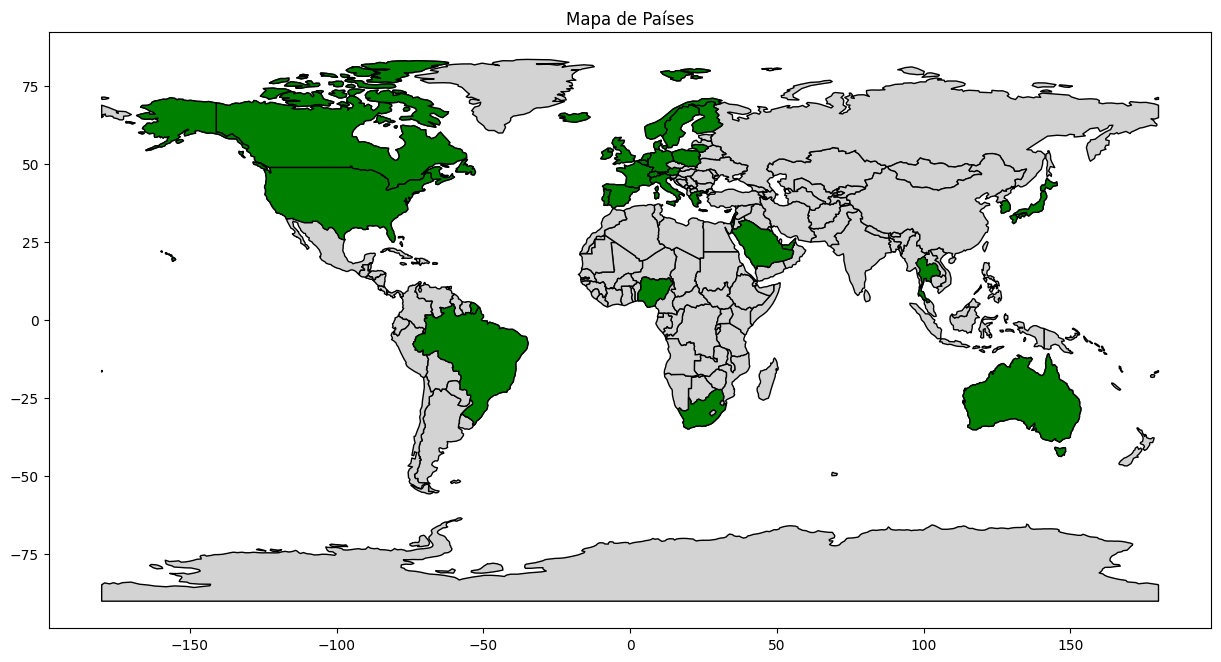

In [133]:
mapeo_paises = {
    'United Kingdom': 'United Kingdom',
    'France': 'France',
    'USA': 'United States of America',
    'Belgium': 'Belgium',
    'Australia': 'Australia',
    'EIRE': 'Ireland',
    'Germany': 'Germany',
    'Portugal': 'Portugal',
    'Japan': 'Japan',
    'Denmark': 'Denmark',
    'Netherlands': 'Netherlands',
    'Poland': 'Poland',
    'Spain': 'Spain',
    'Channel Islands': 'Channel Islands',
    'Italy': 'Italy',
    'Cyprus': 'Cyprus',
    'Greece': 'Greece',
    'Norway': 'Norway',
    'Austria': 'Austria',
    'Sweden': 'Sweden',
    'United Arab Emirates': 'United Arab Emirates',
    'Finland': 'Finland',
    'Switzerland': 'Switzerland',
    'Unspecified': 'Unspecified',
    'Nigeria': 'Nigeria',
    'Malta': 'Malta',
    'RSA': 'South Africa',
    'Singapore': 'Singapore',
    'Bahrain': 'Bahrain',
    'Thailand': 'Thailand',
    'Israel': 'Israel',
    'Lithuania': 'Lithuania',
    'West Indies': 'West Indies',
    'Korea': 'South Korea',
    'Brazil': 'Brazil',
    'Canada': 'Canada',
    'Iceland': 'Iceland',
    'Lebanon': 'Lebanon',
    'Saudi Arabia': 'Saudi Arabia',
    'Czech Republic': 'Czech Republic',
    'European Community': 'European Union'
}

df['Country'] = df['Country'].map(mapeo_paises)

paises_a_marcar = df['Country'].unique()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_subset = world[world.name.isin(paises_a_marcar)]

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

world_subset.plot(ax=ax, color='Green', edgecolor='black')

plt.title('Mapa de Países')
plt.show()

<a id="section32"></a>
### <font color="#004D7F"> 3.2. Reduzir numero de registos (fazer para Portugal) </font>


In [134]:
df_country = df[df['Country'] == 'Portugal']
group = df_country.groupby(['Invoice', 'Description'])['Quantity'].sum()
ds_pivot = group.unstack().fillna(0).reset_index().set_index('Invoice')
ds_pivot

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 PIECE SPACEBOY COOKIE CUTTER SET,...,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP,SUKI AND FRIENDS",YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
Invoice,,,,,,,,,,,,,,,,,,,,,
489599,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
490936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
580545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="section33"></a>
### <font color="#004D7F"> 3.3. One hot encoding (True/False) </font> 

In [135]:
ds_pivot = ds_pivot.map(lambda x: True if x > 0 else False)
ds_pivot

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 PIECE SPACEBOY COOKIE CUTTER SET,...,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP,SUKI AND FRIENDS",YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
Invoice,,,,,,,,,,,,,,,,,,,,,
489599,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
490936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
495748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
496363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
496439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579790,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
580153,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
580545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
total = ds_pivot.shape[0]
print("Total number of transactions for Portugal: ", total)

Total number of transactions for Portugal:  93


<a id="section34"></a>
### <font color="#004D7F"> 3.4. Remover Producto -> Postage  </font> 


In [137]:
ds_pivot.drop('POSTAGE', inplace=True, axis=1)

<a id="section35"></a>
### <font color="#004D7F"> 3.5. Frequent itemsets (Apriori) </font> 
 

In [138]:
min_support=0.03
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True) 
freq_itemsets  

,support,itemsets
0,0.043011,(12 PENCILS TALL TUBE RED RETROSPOT)
1,0.032258,(20 DOLLY PEGS RETROSPOT)
2,0.032258,(3 STRIPEY MICE FELTCRAFT)
3,0.032258,(36 PENCILS TUBE WOODLAND)
4,0.107527,(4 TRADITIONAL SPINNING TOPS)
...,...,...
8909,0.032258,"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI..."
8910,0.032258,"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI..."
8911,0.032258,"(JUMBO BAG PINK POLKADOT, LUNCH BAG PINK POLKA..."
8912,0.032258,"(JUMBO BAG PINK POLKADOT, LUNCH BAG PINK POLKA..."


In [139]:
# Filter frequent itemsets with support greater than 0.03
min_support = 0.03
freq_itemsets_filtered = freq_itemsets[freq_itemsets['support'] > min_support]

# Sort the filtered results by support in descending order
freq_itemsets_filtered = freq_itemsets_filtered.sort_values(by='support', ascending=False)


In [140]:
# Get the list of products
products = [', '.join(item) for item in freq_itemsets_filtered['itemsets']]

# Get the support for each frequent itemset
support_values = freq_itemsets_filtered['support']


In [141]:
# Get the frequency table of products in the frequent itemsets
product_counts = {}
for itemset in freq_itemsets_filtered['itemsets']:
    for product in itemset:
        if product in product_counts:
            product_counts[product] += 1
        else:
            product_counts[product] = 1

# Create a table with the count of times each product was selected
product_table = pd.DataFrame(list(product_counts.items()), columns=['Producto', 'Frecuencia'])
product_table = product_table.sort_values(by='Frecuencia', ascending=False)
print(product_table)


                                Producto  Frecuencia
3      JUMBO SHOPPER VINTAGE RED PAISLEY        3316
5         JUMBO BAG PINK VINTAGE PAISLEY        3123
0                    LUNCH BAG CARS BLUE        2977
22   JUMBO BAG SCANDINAVIAN BLUE PAISLEY        2962
21               LUNCH BAG PINK POLKADOT        2509
..                                   ...         ...
231    RECIPE BOX BLUE SKETCHBOOK DESIGN           1
171                ABC TREASURE BOOK BOX           1
234            FANCY FONT BIRTHDAY CARD,           1
235       FAIRY CAKE BIRTHDAY CANDLE SET           1
269    GROW YOUR OWN BASIL IN ENAMEL MUG           1

[270 rows x 2 columns]


In [142]:
product_table_filtered = product_table[product_table['Frecuencia'] > 100]
print(product_table_filtered)

                                Producto  Frecuencia
3      JUMBO SHOPPER VINTAGE RED PAISLEY        3316
5         JUMBO BAG PINK VINTAGE PAISLEY        3123
0                    LUNCH BAG CARS BLUE        2977
22   JUMBO BAG SCANDINAVIAN BLUE PAISLEY        2962
21               LUNCH BAG PINK POLKADOT        2509
11               JUMBO BAG RED RETROSPOT        2353
1                LUNCH BAG RED RETROSPOT        2043
6            RED RETROSPOT CHARLOTTE BAG        1847
33                 LUNCH BAG SUKI DESIGN        1423
38               JUMBO BAG PINK POLKADOT        1172
117               JUMBO BAG VINTAGE LEAF        1024
114        LUNCH BAG VINTAGE LEAF DESIGN        1024
14           LUNCH BAG DOLLY GIRL DESIGN         924
8              CHARLOTTE BAG SUKI DESIGN         839
12       PLASTERS IN TIN VINTAGE PAISLEY         695
25             LUNCH BAG SPACEBOY DESIGN         623
75        JUMBO  BAG BAROQUE BLACK WHITE         564
4        RETROSPOT TEA SET CERAMIC 11 PC      

<a id="section36"></a>
### <font color="#004D7F"> 3.6. Learning Rules </font> 
 


In [143]:
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1)    
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(20 DOLLY PEGS RETROSPOT),(GRAND CHOCOLATECANDLE),0.032258,0.053763,0.032258,1.000000,18.600000,0.030524,inf,0.977778
1,(GRAND CHOCOLATECANDLE),(20 DOLLY PEGS RETROSPOT),0.053763,0.032258,0.032258,0.600000,18.600000,0.030524,2.419355,1.000000
2,(3 STRIPEY MICE FELTCRAFT),(FELTCRAFT DOLL ROSIE),0.032258,0.032258,0.032258,1.000000,31.000000,0.031217,inf,1.000000
3,(FELTCRAFT DOLL ROSIE),(3 STRIPEY MICE FELTCRAFT),0.032258,0.032258,0.032258,1.000000,31.000000,0.031217,inf,1.000000
4,(BINGO SET),(4 TRADITIONAL SPINNING TOPS),0.086022,0.107527,0.032258,0.375000,3.487500,0.023008,1.427957,0.780392
...,...,...,...,...,...,...,...,...,...,...
349951,(JUMBO BAG PINK VINTAGE PAISLEY),"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.161290,0.032258,0.032258,0.200000,6.200000,0.027055,1.209677,1.000000
349952,(JUMBO SHOPPER VINTAGE RED PAISLEY),"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.182796,0.032258,0.032258,0.176471,5.470588,0.026361,1.175115,1.000000
349953,(JUMBO BAG VINTAGE LEAF),"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.043011,0.032258,0.032258,0.750000,23.250000,0.030871,3.870968,1.000000
349954,(LUNCH BAG VINTAGE LEAF DESIGN),"(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.043011,0.032258,0.032258,0.750000,23.250000,0.030871,3.870968,1.000000


Representar este resultado com Seaborn permite criar um gráfico de dispersão (Scatter Plots). Isso nos possibilita visualizar as diferentes métricas das regras de associação, como o Suporte, a Confiança e o Lift.

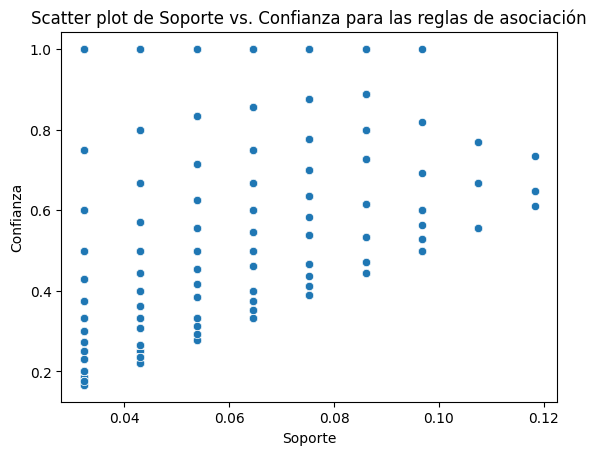

In [144]:

# Scatter plot para Soporte y Confianza
sns.scatterplot(x='support', y='confidence', data=rules)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Scatter plot de Soporte vs. Confianza para las reglas de asociación')
plt.show()


**Confiança:** É uma medida de quão provável é o consequente ocorrer dado o antecedente. Vai de 0.0 a 1.0. Por exemplo, uma **confiança** de 0.6 indica que o consequente é comprado em 60% dos casos quando o antecedente está presente.

**Suporte:** É a proporção de transações que incluem tanto o antecedente quanto o consequente em relação ao total de transações. Geralmente, está na faixa de 0 a 1. No seu caso, vai de 0.04 a 0.12, o que significa que essas regras estão presentes em uma porcentagem de transações que varia de 4% a 12%.

Ao plotar o **suporte** no eixo x e a **confiança** no eixo y, é possível visualizar como essas métricas estão distribuídas para diferentes regras de associação. Essa representação ajuda a identificar padrões, relações ou clusters de regras com base nessas métricas. Por exemplo, é possível procurar agrupamentos de regras com alta **confiança** e baixo **suporte**, ou vice-versa, e analisar o significado desses padrões para a análise de associação.

<a id="section4"></a>
## <font color="#004D7F"> 4. Filtragem das regras </font> 


<a id="section41"></a>
### <font color="#004D7F"> 4.1. Adicionar coluna com número de antecedentes </font> 


In [145]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))


In [146]:
filtered_rules = rules[ (rules['confidence'] > 0.75) & (rules['lift'] > 1.2)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(20 DOLLY PEGS RETROSPOT),(GRAND CHOCOLATECANDLE),0.032258,0.053763,0.032258,1.0,18.60,0.030524,inf,0.977778,1
2,(3 STRIPEY MICE FELTCRAFT),(FELTCRAFT DOLL ROSIE),0.032258,0.032258,0.032258,1.0,31.00,0.031217,inf,1.000000,1
3,(FELTCRAFT DOLL ROSIE),(3 STRIPEY MICE FELTCRAFT),0.032258,0.032258,0.032258,1.0,31.00,0.031217,inf,1.000000,1
48,(WOODEN BOX OF DOMINOES),(4 TRADITIONAL SPINNING TOPS),0.053763,0.107527,0.043011,0.8,7.44,0.037230,4.462366,0.914773,1
51,(50'S CHRISTMAS GIFT BAG LARGE),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.032258,0.043011,0.032258,1.0,23.25,0.030871,inf,0.988889,1
...,...,...,...,...,...,...,...,...,...,...,...
349918,"(LUNCH BAG SPACEBOY DESIGN, JUMBO BAG RED RETR...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.032258,0.032258,0.032258,1.0,31.00,0.031217,inf,1.000000,2
349922,"(LUNCH BAG SPACEBOY DESIGN, JUMBO BAG VINTAGE ...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.032258,0.032258,0.032258,1.0,31.00,0.031217,inf,1.000000,2
349923,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG VINTAGE ...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.032258,0.032258,0.032258,1.0,31.00,0.031217,inf,1.000000,2
349944,"(JUMBO BAG VINTAGE LEAF, RED RETROSPOT CHARLOT...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",0.032258,0.032258,0.032258,1.0,31.00,0.031217,inf,1.000000,2


In [147]:
def get_recommendations_for_product(my_rules, product):
    # Product antecents or consequents
    product_rules = my_rules[my_rules['antecedents'].apply(lambda x: product in x) | my_rules['consequents'].apply(lambda x: product in x)]

    return product_rules[['antecedents', 'consequents']]

<a id="section42"></a>
### <font color="#004D7F"> 4.2. Exemplo para os recomendados de certo produto </font> 


In [148]:
my_product = 'JUMBO BAG VINTAGE LEAF'

In [149]:
product_recommendations = get_recommendations_for_product(filtered_rules, my_product)
product_recommendations

,antecedents,consequents
752,(JUMBO BAG VINTAGE LEAF),(JUMBO BAG PINK VINTAGE PAISLEY)
844,(JUMBO BAG VINTAGE LEAF),(JUMBO BAG RED RETROSPOT)
899,(JUMBO BAG VINTAGE LEAF),(JUMBO BAG SCANDINAVIAN BLUE PAISLEY)
1020,(JUMBO BAG VINTAGE LEAF),(JUMBO SHOPPER VINTAGE RED PAISLEY)
1023,(JUMBO BAG VINTAGE LEAF),(LUNCH BAG CARS BLUE)
...,...,...
349918,"(LUNCH BAG SPACEBOY DESIGN, JUMBO BAG RED RETR...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI..."
349922,"(LUNCH BAG SPACEBOY DESIGN, JUMBO BAG VINTAGE ...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI..."
349923,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG VINTAGE ...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI..."
349944,"(JUMBO BAG VINTAGE LEAF, RED RETROSPOT CHARLOT...","(LUNCH BAG PINK POLKADOT, JUMBO BAG SCANDINAVI..."


<a id="section43"></a>
### <font color="#004D7F"> 4.3. Extrair apenas os produtos relacionados com o produto em análise </font> 


In [150]:
antecedent_list = product_recommendations['antecedents'].tolist()
consequent_list = product_recommendations['consequents'].tolist()
all_values = antecedent_list + consequent_list
related_products_list = [value for value in all_values if my_product not in value]

unique_elements = set()
for frozenset_value in related_products_list:
    unique_elements.update(frozenset_value)
    
print(f'Products related to {my_product}:\n')
for product in unique_elements:
    print(product)

Products related to JUMBO BAG VINTAGE LEAF:

LUNCH BAG PINK POLKADOT
LUNCH BAG SPACEBOY DESIGN
JUMBO BAG SCANDINAVIAN BLUE PAISLEY
LUNCH BAG CARS BLUE
LUNCH BAG VINTAGE LEAF DESIGN
RED RETROSPOT CHARLOTTE BAG
JUMBO BAG PINK POLKADOT
LUNCH BAG RED RETROSPOT
JUMBO BAG RED RETROSPOT
LUNCH BAG SUKI DESIGN
JUMBO BAG PINK VINTAGE PAISLEY
JUMBO SHOPPER VINTAGE RED PAISLEY


<a id="section5"></a>
## <font color="#004D7F"> 5. Segmentacao de clientes (Kmeans) </font> 



<a id="section51"></a>
### <font color="#004D7F"> 5.1. RFM (Recency, Frequency, Monetary) </font> 



In [151]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [152]:
last_date = max(df.InvoiceDate) + pd.DateOffset(days=1) # last date of InvoiceDate + 1 day
df["Monetary"] = df['Quantity'] * df['Price']

# date.max() -> the maximum (latest) date within each group (customer id)
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (last_date - date.max()).days, 
                                    'Invoice': lambda invoice: invoice.nunique(),
                                    'Monetary': lambda amount: amount.sum()})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

# Rename columns
RFM.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency'}, inplace=True)
RFM.reset_index(drop=True, inplace=True)     

In [153]:
#RFMT
Shopping_Cycle = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})
Shopping_Cycle.reset_index(drop=True, inplace=True)    
RFMT = RFM.copy()
RFMT["Shopping_Cycle"] = Shopping_Cycle
RFMT["Interpurchase_Time"] = RFMT["Shopping_Cycle"] // RFMT["Frequency"]
RFMT.drop("Shopping_Cycle", axis=1, inplace=True)

RFMT.head()


,Recency,Frequency,Monetary,Interpurchase_Time
0,326,12,77556.46,33
1,2,8,4921.53,50
2,75,5,2019.40,72
3,19,4,4428.69,142
4,310,1,334.40,0


<a id="section52"></a>
### <font color="#004D7F"> 5.2. Remover Outliers (manter dados entre o percentil 5 e 95) </font> 



### 

In [154]:
columns_to_remove_outliers = ['Recency', 'Frequency', 'Monetary']
quantile_range = 0.05, 0.95

for column in columns_to_remove_outliers:
    Q1 = RFM[column].quantile(quantile_range[0])
    Q3 = RFM[column].quantile(quantile_range[1])
    IQR = Q3 - Q1
    RFM = RFM[(RFM[column] >= Q1 - 1.5*IQR) & (RFM[column] <= Q3 + 1.5*IQR)]
RFM

,Recency,Frequency,Monetary
1,2,8,4921.53
2,75,5,2019.40
3,19,4,4428.69
4,310,1,334.40
5,375,1,300.93
...,...,...,...
5873,4,22,2664.90
5874,432,1,461.68
5875,661,1,427.00
5876,477,2,1296.43


<a id="section53"></a>
### <font color="#004D7F"> 5.3. Standardizar Dados </font> 



### 

In [155]:
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(RFM)
df_scaled = pd.DataFrame(scaled_rfm)
df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_scaled

,Recency,Frequency,Monetary
0,-0.964852,0.449334,1.108262
1,-0.616551,-0.035624,0.053517
2,-0.883741,-0.197277,0.929145
3,0.504693,-0.682235,-0.558877
4,0.814824,-0.682235,-0.571041
...,...,...,...
5767,-0.955310,2.712474,0.288116
5768,1.086785,-0.682235,-0.512618
5769,2.179402,-0.682235,-0.525222
5770,1.301492,-0.520583,-0.209238


<a id="section54"></a>
### <font color="#004D7F"> 5.4. Elbow Method </font> 



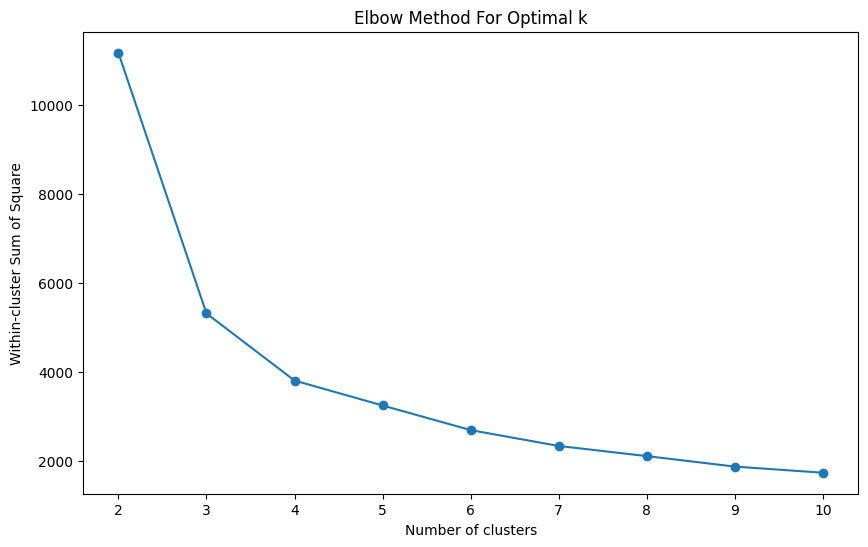

In [156]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

<a id="section55"></a>
### <font color="#004D7F"> 5.5. Silhouette Score </font> 


### 

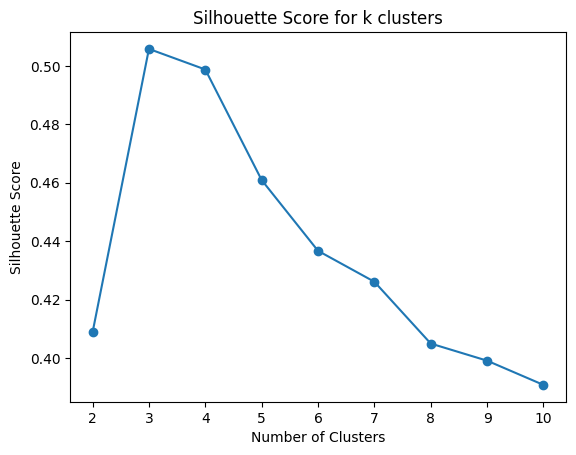

In [157]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init='auto')
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k clusters')
plt.show()

<a id="section56"></a>
### <font color="#004D7F"> 5.6. Clustering and Evaluating </font> 


### 

In [158]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit_predict(df_scaled)

array([0, 0, 0, ..., 1, 1, 0])

In [159]:
Rfm_with_clusters = RFM.copy()
Rfm_with_clusters['ClusterID'] = kmeans.labels_

# Get the centroids of each cluster
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Recency', 'Frequency', 'Monetary'])
print("\nCentroids:")
print(centroids)
Rfm_with_clusters


Centroids:
      Recency  Frequency     Monetary
0   74.487485   4.751221  1517.056660
1  463.655347   2.019260   627.420306
2   38.158700  20.235182  8792.095302


,Recency,Frequency,Monetary,ClusterID
1,2,8,4921.53,0
2,75,5,2019.40,0
3,19,4,4428.69,0
4,310,1,334.40,1
5,375,1,300.93,1
...,...,...,...,...
5873,4,22,2664.90,2
5874,432,1,461.68,1
5875,661,1,427.00,1
5876,477,2,1296.43,1


In [160]:
km_cluster_Monetary =Rfm_with_clusters.groupby("ClusterID").Monetary.mean()
km_cluster_Recency =Rfm_with_clusters.groupby("ClusterID").Recency.mean()
km_cluster_Frequency =Rfm_with_clusters.groupby("ClusterID").Frequency.mean()

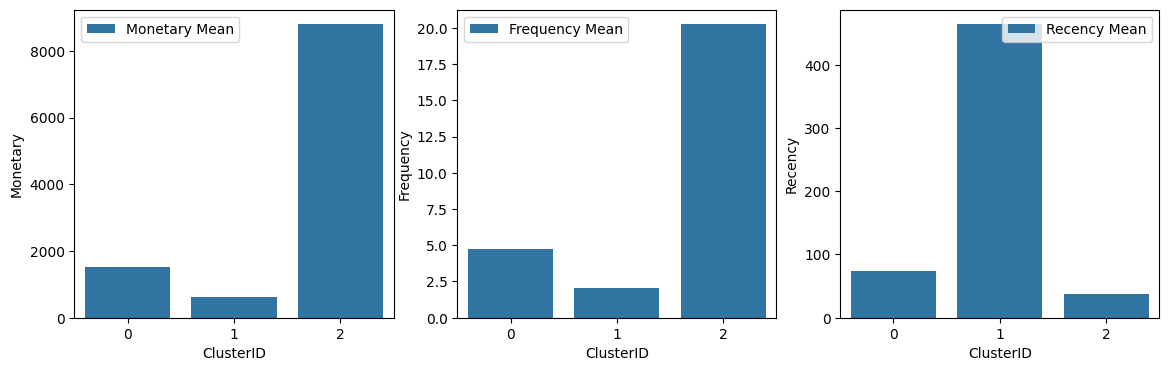

In [161]:
fig, axs = plt.subplots(1, 3, figsize = (14, 4))
sns.barplot(x = Rfm_with_clusters['ClusterID'].unique(),  y = km_cluster_Monetary , ax = axs[0], label='Monetary Mean')
sns.barplot(x = Rfm_with_clusters['ClusterID'].unique(),  y = km_cluster_Frequency , ax = axs[1], label='Frequency Mean')
sns.barplot(x = Rfm_with_clusters['ClusterID'].unique(),  y = km_cluster_Recency , ax = axs[2], label='Recency Mean')

for ax in axs:
    ax.set_xlabel('ClusterID')
    ax.legend()




<a id="section57"></a>
### <font color="#004D7F"> 5.7. 3D Scatter Plot </font> 



### 

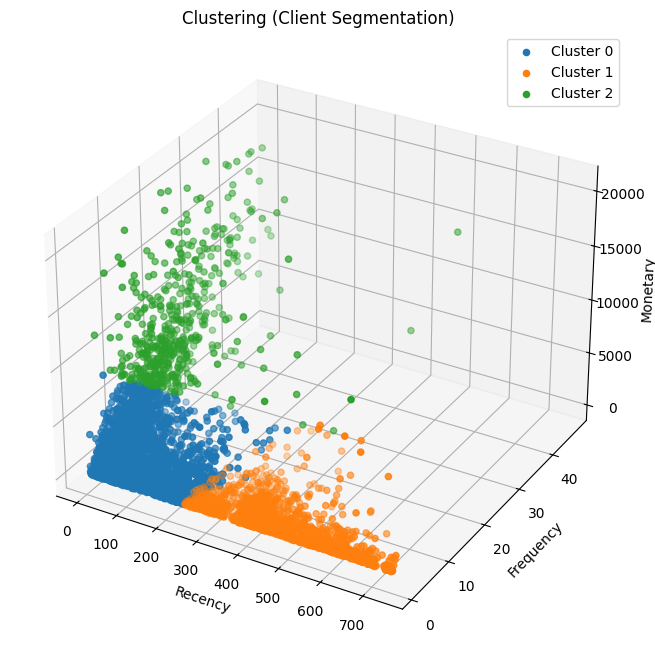

In [162]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in Rfm_with_clusters['ClusterID'].unique():
    cluster_data = Rfm_with_clusters[Rfm_with_clusters['ClusterID'] == cluster]
    ax.scatter3D(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')
        

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Clustering (Client Segmentation)')

ax.legend()
plt.show()

In [163]:
fig = px.scatter_3d(Rfm_with_clusters, x='Recency', y='Frequency', z='Monetary', color='ClusterID',
                    title='Clustering (Client Segmentation)', labels={'Recency': 'Recency', 
                                                                      'Frequency': 'Frequency', 
                                                                      'Monetary': 'Monetary'})

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    width=800,  
    height=600   
)

fig.show()


<a id="section6"></a>
## <font color="#004D7F"> 6. Segmentacao de clientes (Kmeans) RFMT </font> 



<a id="section61"></a>
### <font color="#004D7F"> 6.1. Remover Outliers (manter dados entre o percentil 5 e 95) no RFMT </font> 



### 

In [164]:
RFMT

,Recency,Frequency,Monetary,Interpurchase_Time
0,326,12,77556.46,33
1,2,8,4921.53,50
2,75,5,2019.40,72
3,19,4,4428.69,142
4,310,1,334.40,0
...,...,...,...,...
5873,4,22,2664.90,29
5874,432,1,461.68,0
5875,661,1,427.00,0
5876,477,2,1296.43,123


In [165]:
columns_to_remove_outliers = ['Recency', 'Frequency', 'Monetary', 'Interpurchase_Time']
quantile_range = 0.05, 0.95

for column in columns_to_remove_outliers:
    Q1 = RFMT[column].quantile(quantile_range[0])
    Q3 = RFMT[column].quantile(quantile_range[1])
    IQR = Q3 - Q1
    RFMT = RFMT[(RFMT[column] >= Q1 - 1.5*IQR) & (RFMT[column] <= Q3 + 1.5*IQR)]
RFMT

,Recency,Frequency,Monetary,Interpurchase_Time
1,2,8,4921.53,50
2,75,5,2019.40,72
3,19,4,4428.69,142
4,310,1,334.40,0
5,375,1,300.93,0
...,...,...,...,...
5873,4,22,2664.90,29
5874,432,1,461.68,0
5875,661,1,427.00,0
5876,477,2,1296.43,123


<a id="section62"></a>
### <font color="#004D7F"> 6.2. Elbow Method (RFMT) </font> 



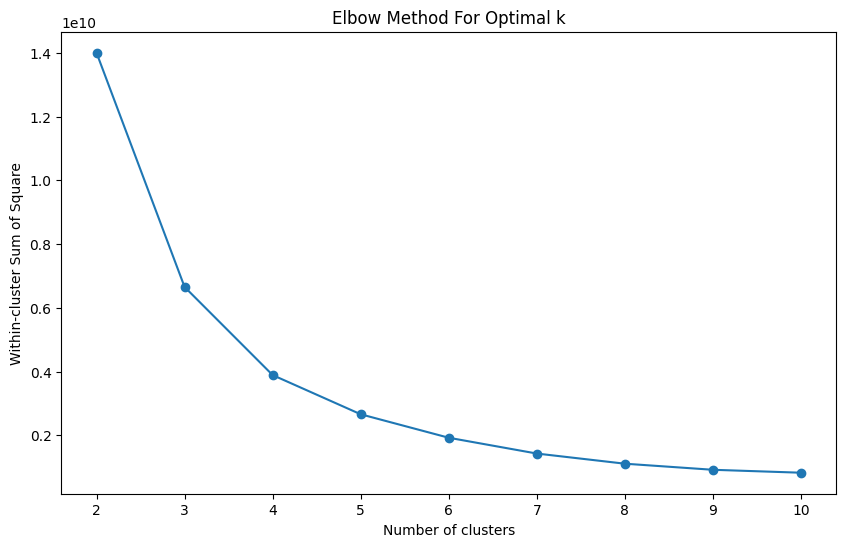

In [166]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(RFMT)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

<a id="section63"></a>
### <font color="#004D7F"> 6.3. Silhouette Score (RFMT) </font> 


### 

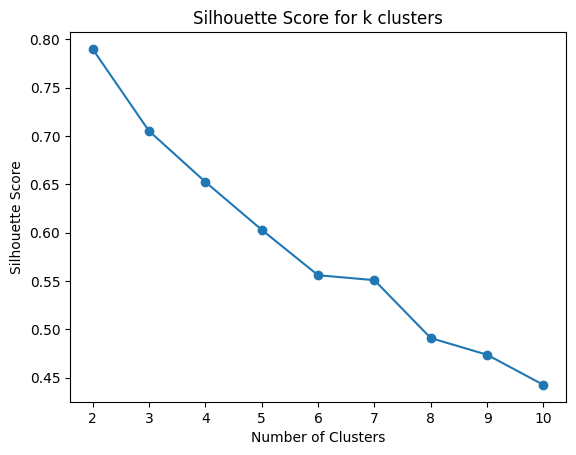

In [167]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,  n_init='auto')
    kmeans.fit(RFMT)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(RFMT, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k clusters')
plt.show()

<a id="section64"></a>
### <font color="#004D7F"> 6.4. Clustering (RFMT) </font> 


### 

In [168]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit_predict(RFMT)

array([0, 0, 0, ..., 3, 3, 0])

<a id="section65"></a>
### <font color="#004D7F"> 6.5. Standardizar Dados </font> 



In [169]:
desired_clusters = 4  # Define o número de clusters desejado

kmeans = KMeans(n_clusters=desired_clusters)

# Inicialize e ajuste o StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFMT)

# Aplique o KMeans nos dados normalizados
kmeans = KMeans(n_clusters=desired_clusters)
kmeans.fit(scaled_data)

# Obtenha os rótulos dos clusters e adicione-os aos dados originais
RFMT_with_clusters = RFMT.copy()
RFMT_with_clusters['ClusterID'] = kmeans.labels_

# Inverta a transformação do scaler para os centroides dos clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Crie um DataFrame com os centroides
centroid_df = pd.DataFrame(centroids, columns=["Recency", "Frequency", "Monetary", "Interpurchase_Time"])
print(centroid_df)


      Recency  Frequency     Monetary  Interpurchase_Time
0  467.594187   1.909580   589.814565           15.475242
1   70.175556   5.417472  1729.005702           40.303654
2  119.286538   3.338462  1114.938042          144.291346
3   38.202840  20.716024  8993.651365           33.758621


c:\Users\eel20\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




<a id="section66"></a>
### <font color="#004D7F"> 6.6. Evaluating (RFMT) </font> 


### 

In [170]:
Rfmt_with_clusters = RFMT.copy()
Rfmt_with_clusters['ClusterID'] = kmeans.labels_

# Get the centroids of each cluster
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=["Recency","Frequency","Monetary","Interpurchase_Time"])
print("\nCentroids:")
print(centroids)
Rfmt_with_clusters


Centroids:
      Recency  Frequency     Monetary  Interpurchase_Time
0  467.594187   1.909580   589.814565           15.475242
1   70.175556   5.417472  1729.005702           40.303654
2  119.286538   3.338462  1114.938042          144.291346
3   38.202840  20.716024  8993.651365           33.758621


,Recency,Frequency,Monetary,Interpurchase_Time,ClusterID
1,2,8,4921.53,50,1
2,75,5,2019.40,72,1
3,19,4,4428.69,142,2
4,310,1,334.40,0,0
5,375,1,300.93,0,0
...,...,...,...,...,...
5873,4,22,2664.90,29,3
5874,432,1,461.68,0,0
5875,661,1,427.00,0,0
5876,477,2,1296.43,123,2


In [171]:
km_cluster_Monetary =Rfmt_with_clusters.groupby("ClusterID").Monetary.mean()
km_cluster_Recency =Rfmt_with_clusters.groupby("ClusterID").Recency.mean()
km_cluster_Frequency =Rfmt_with_clusters.groupby("ClusterID").Frequency.mean()
km_cluster_Interpurchase_Time =Rfmt_with_clusters.groupby("ClusterID").Interpurchase_Time.mean()

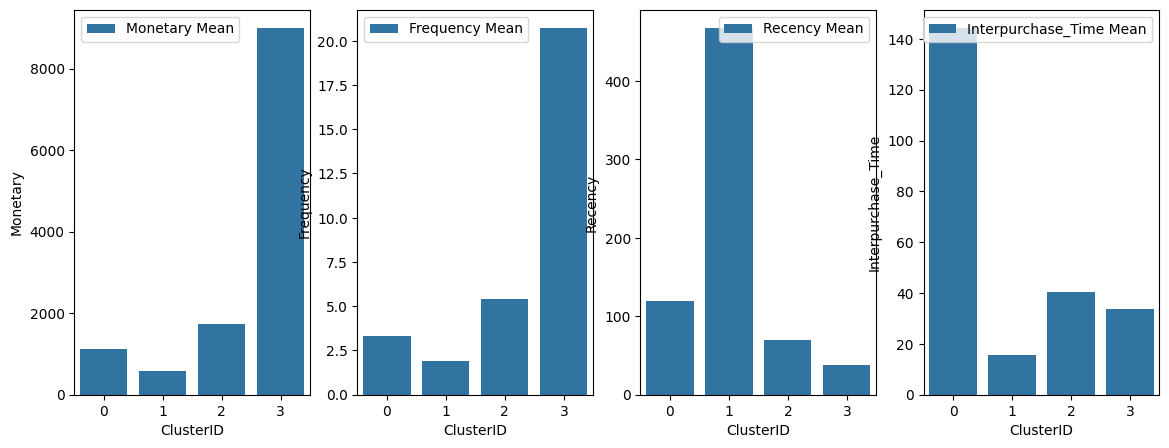

In [172]:
fig, axs = plt.subplots(1, 4, figsize=(14, 5))

sns.barplot(x=Rfmt_with_clusters['ClusterID'].unique(), y=km_cluster_Monetary, ax=axs[0], label='Monetary Mean')
sns.barplot(x=Rfmt_with_clusters['ClusterID'].unique(), y=km_cluster_Frequency, ax=axs[1], label='Frequency Mean')
sns.barplot(x=Rfmt_with_clusters['ClusterID'].unique(), y=km_cluster_Recency, ax=axs[2], label='Recency Mean')
sns.barplot(x=Rfmt_with_clusters['ClusterID'].unique(), y=km_cluster_Interpurchase_Time, ax=axs[3], label='Interpurchase_Time Mean')

for ax in axs:
    ax.set_xlabel('ClusterID')
    ax.legend()


<a id="section67"></a>
### <font color="#004D7F"> 6.7. 3D Scatter Plot (RFMT) </font> 



### 

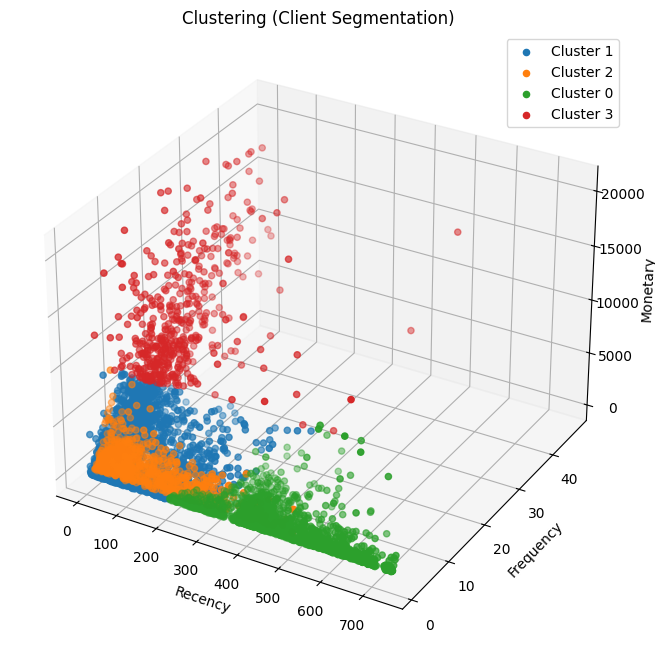

In [173]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in Rfmt_with_clusters['ClusterID'].unique():
    cluster_data = Rfmt_with_clusters[Rfmt_with_clusters['ClusterID'] == cluster]
    ax.scatter3D(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')
        

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Clustering (Client Segmentation)')

ax.legend()
plt.show()

In [174]:
fig = px.scatter_3d(Rfmt_with_clusters, x='Recency', y='Frequency', z='Monetary', color='ClusterID',
                    title='Clustering (Client Segmentation)', labels={'Recency': 'Recency', 
                                                                      'Frequency': 'Frequency', 
                                                                      'Monetary': 'Monetary'})

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    width=800,  
    height=600   
)

fig.show()
